### Customer Profiling

This activity is meant to give you practice exploring data including the use of visualizations with `matplotlib`, `seaborn`, and `plotly`.  The dataset contains demographic information on the customers, information on customer purchases, engagement of customers with promotions, and information on where customer purchases happened.  A complete data dictionary can be found below.  

Your task is to explore the data and use visualizations to inform answers to specific questions using the data.  The questions and resulting visualization should be posted in the group discussion related to this activity.  Some example problems/questions to explore could be:

-----

- Does income differentiate customers who purchase wine? 
- What customers are more likely to participate in the last promotional campaign?
- Are customers with children more likely to purchase products online?
- Do married people purchase more wine?
- What kinds of purchases led to customer complaints?

-----

### Data Dictionary

Attributes


```
ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if customer complained in the last 2 years, 0 otherwise


MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion


AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise


NumWebPurchases: Number of purchases made through the company’s web site
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s web site in the last month
```

In [21]:
from scipy.stats import uniform
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.ticker as ticker
import plotly.express as px
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency


In [4]:
df = pd.read_csv('C:/Users/Luswata/Dropbox/ML_AI_UCBerkeley/Data/marketing_campaign.csv', sep = '\t')
df.sample(10)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1189  5231        1974    2n Cycle        Married  45894.0        0         2   
1669  4127        1967         PhD        Married  77766.0        0         1   
651   6728        1985  Graduation       Together  29103.0        1         0   
24    1409        1951  Graduation       Together  40689.0        0         1   
1584  4608        1987  Graduation       Divorced  81361.0        0         0   
142   8690        1962  Graduation        Married  86111.0        0         0   
12    2125        1959  Graduation       Divorced  63033.0        0         0   
425   7284        1953  Graduation        Married  48686.0        1         2   
1436  8588        1961  Graduation        Married  60544.0        1         1   
813   3732        1955      Master        Married  52750.0        0         1   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
1189  27-02-2014       15        27  ...                  5             0   
1669  22-02-2013       97      1004  ...                  6             1   
651   27-08-2012       38        16  ...                  9             0   
24    18-03-2013       69       270  ...                  8             0   
1584  25-02-2014       18       163  ...                  1             0   
142   19-04-2013       73       399  ...                  2             0   
12    15-11-2013       82       194  ...                  2             0   
425   04-12-2013        8        10  ...                  8             0   
1436  25-08-2012       92       201  ...                  6             0   
813   04-02-2013       72       393  ...                  4             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
1189             0             0             0             0         0   
1669             0             0             0             0         0   
651              0             0             0             0         0   
24               0             0             0             0         0   
1584             0             0             0             0         0   
142              0             0             0             0         0   
12               0             0             0             0         0   
425              0             0             0             0         0   
1436             0             0             0             0         0   
813              0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
1189              3         11         0  
1669              3         11         1  
651               3         11         0  
24                3         11         0  
1584              3         11         1  
142               3         11         0  
12                3         11         0  
425               3         11         0  
1436              3         11         0  
813               3         11         0  

[10 rows x 29 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
num_var = ['Income', 'MntWines', 'Response', 'Year_Birth']
print(df[num_var].describe())


              Income     MntWines     Response   Year_Birth
count    2216.000000  2240.000000  2240.000000  2240.000000
mean    52247.251354   303.935714     0.149107  1968.805804
std     25173.076661   336.597393     0.356274    11.984069
min      1730.000000     0.000000     0.000000  1893.000000
25%     35303.000000    23.750000     0.000000  1959.000000
50%     51381.500000   173.500000     0.000000  1970.000000
75%     68522.000000   504.250000     0.000000  1977.000000
max    666666.000000  1493.000000     1.000000  1996.000000


C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



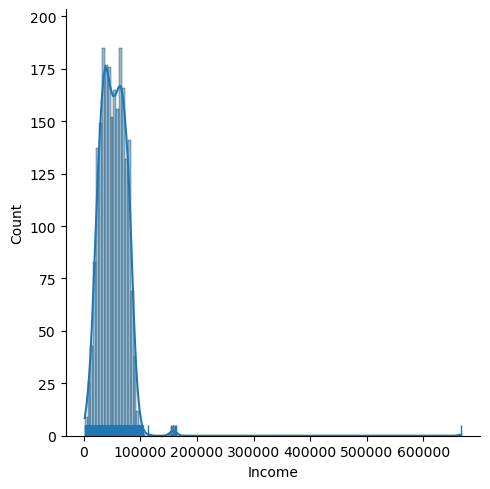

In [11]:
sns.displot(df["Income"], kde = True, rug = True)

C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



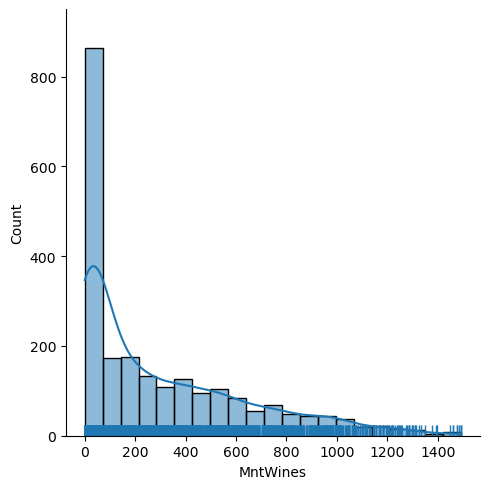

In [12]:
sns.displot(df["MntWines"], kde = True, rug = True)

In [8]:
correlation_coefficient = df['Income'].corr(df['MntWines'])
correlation_coefficient

0.5786497501367384

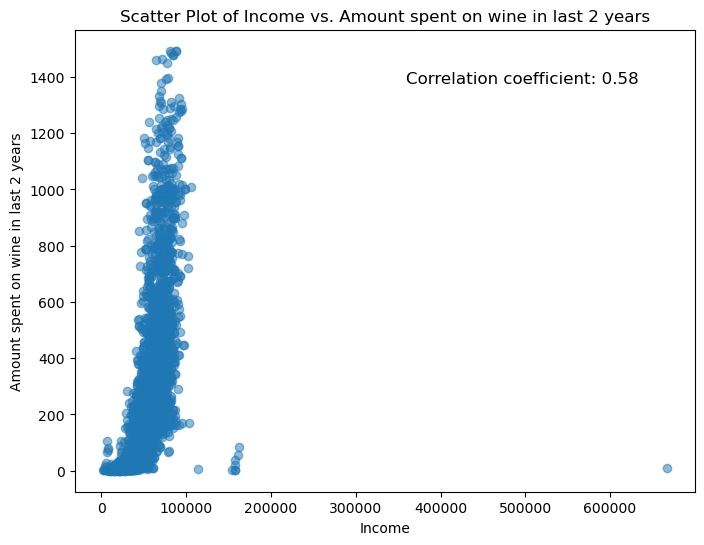

In [10]:
#px.scatter(df, x="Income", y="MntWines")

x = df['Income']
y = df['MntWines']

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of Income vs. Amount spent on wine in last 2 years')
plt.xlabel('Income')
plt.ylabel('Amount spent on wine in last 2 years')

# Calculate correlation coefficient
#correlation_coefficient = np.corrcoef(x, y)[0, 1]
correlation_coefficient = x.corr(y)

# Display correlation coefficient on plot
#plt.text(10000, 50, f'Correlation coefficient: {correlation_coefficient:.2f}', fontsize=12)
plt.text(x.max() * 0.95, y.max() * 0.95, f'Correlation coefficient: {correlation_coefficient:.2f}', fontsize=12, ha='right', va='top')

plt.show()


C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



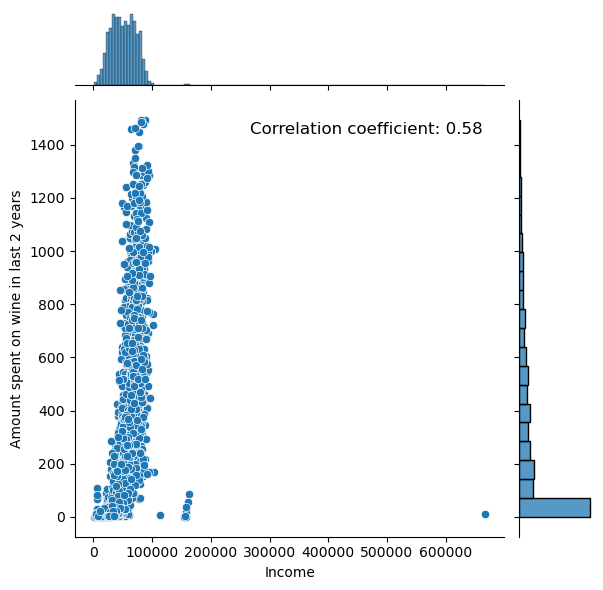

In [17]:

# Create joint plot
joint_plot = sns.jointplot(x='Income', y='MntWines', data=df, kind='scatter')
#sns.jointplot(df, x="Income", y="MntWines", kind = "hex" )

# Calculate correlation coefficient
correlation_coefficient = df['Income'].corr(df['MntWines'])

# Add correlation coefficient to top right corner
joint_plot.ax_joint.annotate(f'Correlation coefficient: {correlation_coefficient:.2f}', xy=(0.95, 0.95), xycoords='axes fraction', ha='right', va='top', fontsize=12)

#plt.title('Joint Plot of Income vs. Amount spent on wine in last 2 years')
plt.xlabel('Income')
plt.ylabel('Amount spent on wine in last 2 years')

plt.show()

In [19]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [26]:
# Create a crosstab
crosstab = pd.crosstab(df['Education'], df['Response'])
print(crosstab)

crosstab1 = pd.crosstab(df['Education'], df['Response'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

Response      0    1
Education           
2n Cycle    181   22
Basic        52    2
Graduation  975  152
Master      313   57
PhD         385  101
Response           0         1
Education                     
2n Cycle    0.891626  0.108374
Basic       0.962963  0.037037
Graduation  0.865129  0.134871
Master      0.845946  0.154054
PhD         0.792181  0.207819
Chi-square statistic: 23.0760975769431
P-value: 0.00012226975294505314
Degrees of freedom: 4
Expected frequencies table:
 [[172.73125     30.26875   ]
 [ 45.94821429   8.05178571]
 [958.95625    168.04375   ]
 [314.83035714  55.16964286]
 [413.53392857  72.46607143]]


<Axes: xlabel='Response', ylabel='Year_Birth'>

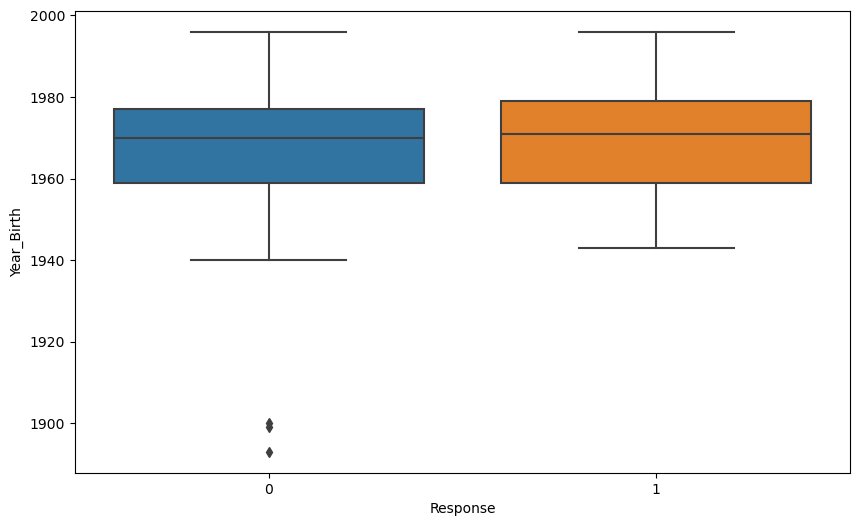

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y="Year_Birth", data=df)

In [33]:
# Create a crosstab
crosstab = pd.crosstab(df['Kidhome'], df['Response'])
print(crosstab)

crosstab1 = pd.crosstab(df['Kidhome'], df['Response'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)

Response     0    1
Kidhome            
0         1071  222
1          789  110
2           46    2
Response         0         1
Kidhome                     
0         0.828306  0.171694
1         0.877642  0.122358
2         0.958333  0.041667
Chi-square statistic: 14.636200199180582
P-value: 0.0006634214493033543
Degrees of freedom: 2
Expected frequencies table:
 [[1100.20446429  192.79553571]
 [ 764.95267857  134.04732143]
 [  40.84285714    7.15714286]]


(-5.0, 200000.0)

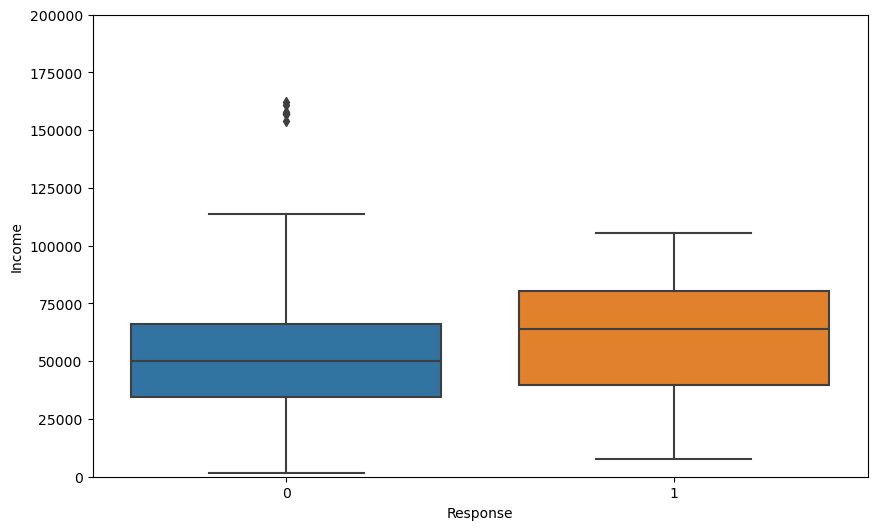

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y="Income", data=df)
plt.ylim(-5, 200000)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

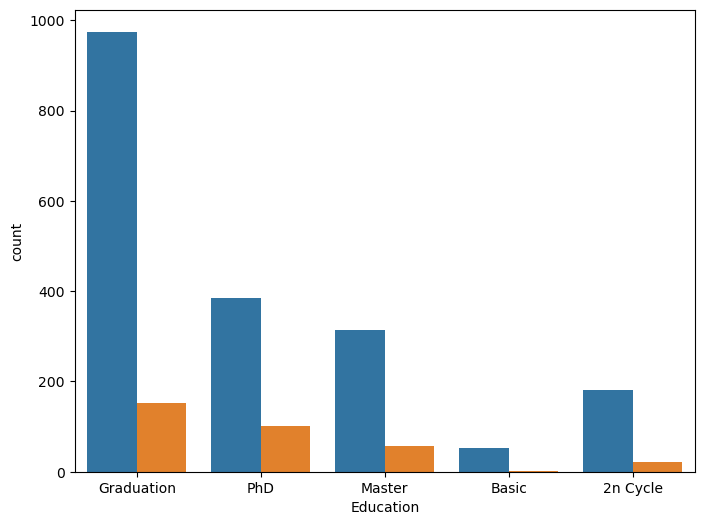

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', hue='Response', data=df)

plt.title('Count by Education level and Response')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

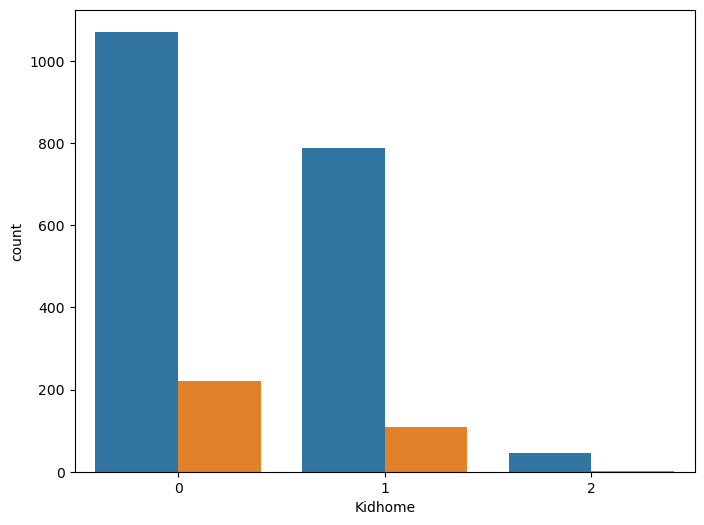

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Kidhome', hue='Response', data=df)

plt.title('Count by Kids at home and Response')
plt.xlabel('Kids at home')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

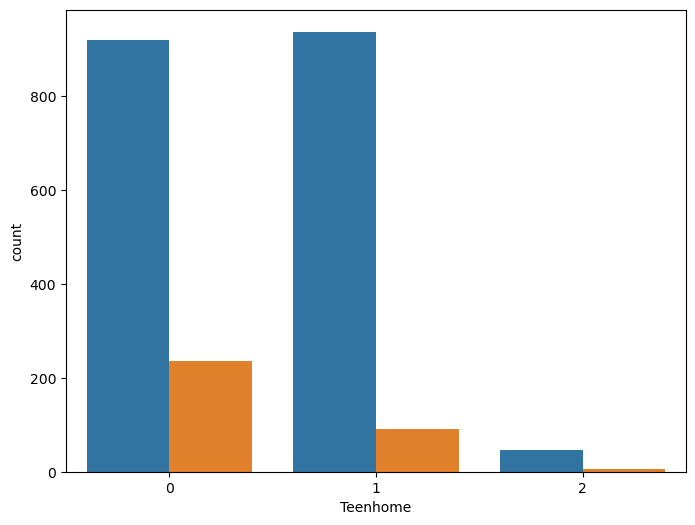

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Teenhome', hue='Response', data=df)

plt.title('Count by teenage Kids at home and Response')
plt.xlabel('Teen Kids at home')
plt.ylabel('Count')
plt.legend(title='Response')
plt.show()

In [43]:
num_var = ['Dt_Customer', 'Recency', 'Complain', 'NumWebPurchases', 'NumWebVisitsMonth', 'NumCatalogPurchases', 'NumStorePurchases']
print(df[num_var].describe())

           Recency     Complain  NumWebPurchases  NumWebVisitsMonth  \
count  2240.000000  2240.000000      2240.000000        2240.000000   
mean     49.109375     0.009375         4.084821           5.316518   
std      28.962453     0.096391         2.778714           2.426645   
min       0.000000     0.000000         0.000000           0.000000   
25%      24.000000     0.000000         2.000000           3.000000   
50%      49.000000     0.000000         4.000000           6.000000   
75%      74.000000     0.000000         6.000000           7.000000   
max      99.000000     1.000000        27.000000          20.000000   

       NumCatalogPurchases  NumStorePurchases  
count          2240.000000        2240.000000  
mean              2.662054           5.790179  
std               2.923101           3.250958  
min               0.000000           0.000000  
25%               0.000000           3.000000  
50%               2.000000           5.000000  
75%               4.0000

Response         0    1
AcceptedCmp5           
0             1835  242
1               71   92
Response             0         1
AcceptedCmp5                    
0             0.883486  0.116514
1             0.435583  0.564417
Chi-square statistic: 235.46774912127177
P-value: 3.8280454367522022e-53
Degrees of freedom: 1
Expected frequencies table:
 [[1767.30446429  309.69553571]
 [ 138.69553571   24.30446429]]


AttributeError: 'numpy.int64' object has no attribute 'startswith'

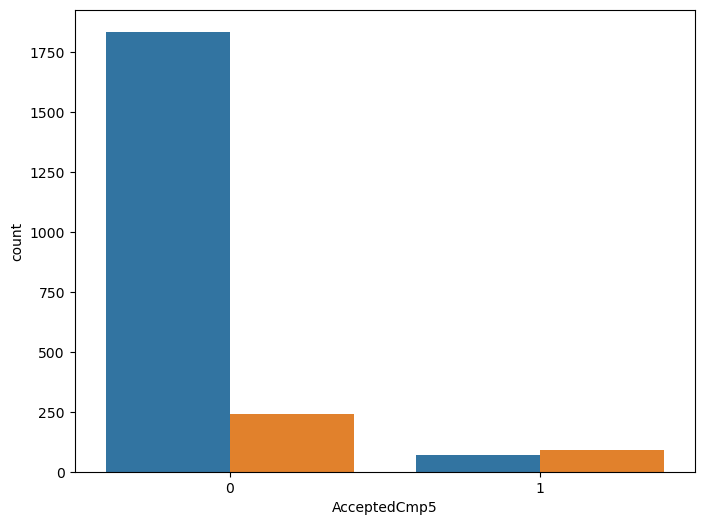

In [50]:
crosstab = pd.crosstab(df['AcceptedCmp5'], df['Response'])
print(crosstab)

crosstab1 = pd.crosstab(df['AcceptedCmp5'], df['Response'], normalize='index')
print(crosstab1)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:\n", expected)


plt.figure(figsize=(8, 6))
sns.countplot(x='AcceptedCmp5', hue='Response', data=df)

plt.show()

<Axes: xlabel='Response', ylabel='NumWebPurchases'>

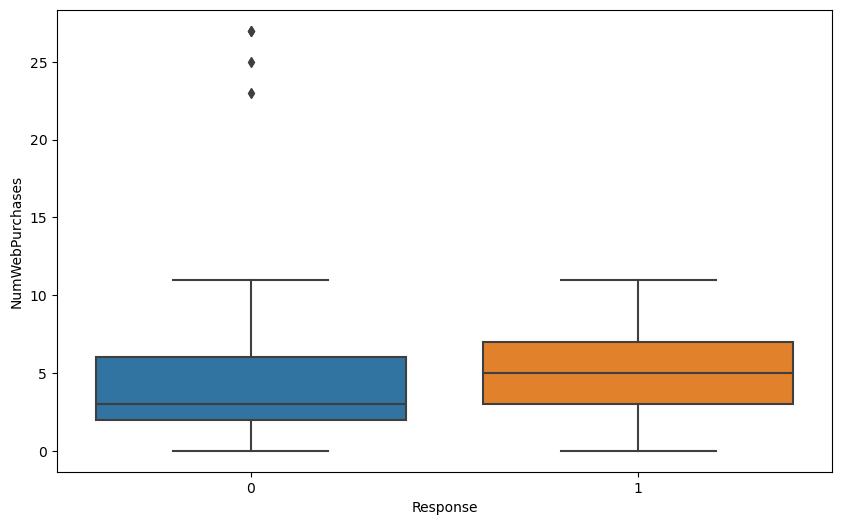

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y="NumWebPurchases", data=df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

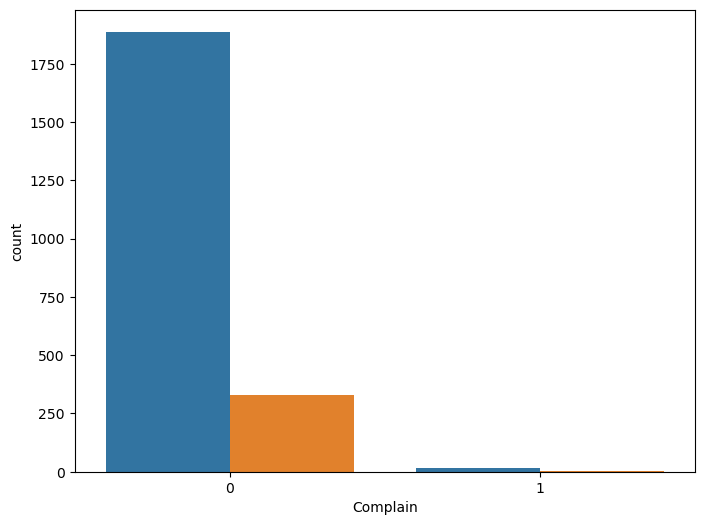

In [52]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Complain', hue='Response', data=df)

plt.show()

<Axes: xlabel='Kidhome', ylabel='NumWebPurchases'>

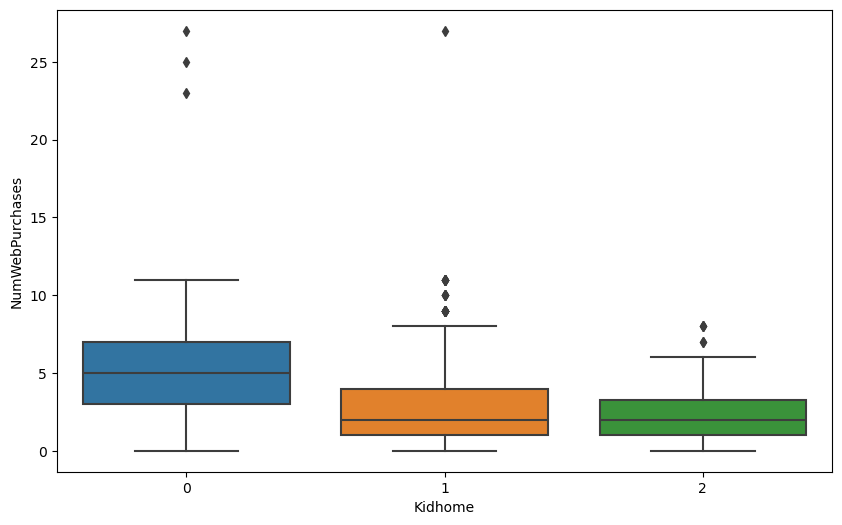

In [53]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kidhome', y="NumWebPurchases", data=df)

<Axes: xlabel='Teenhome', ylabel='NumWebPurchases'>

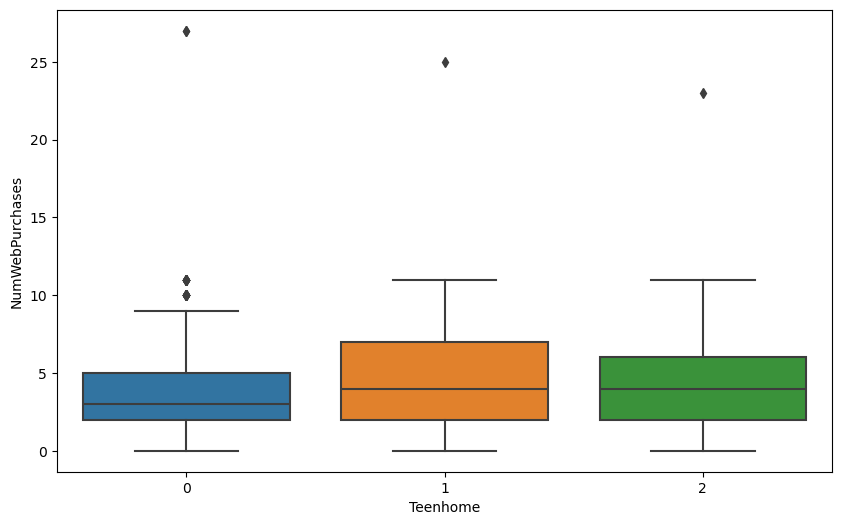

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Teenhome', y="NumWebPurchases", data=df)

<Axes: xlabel='Marital_Status', ylabel='MntWines'>

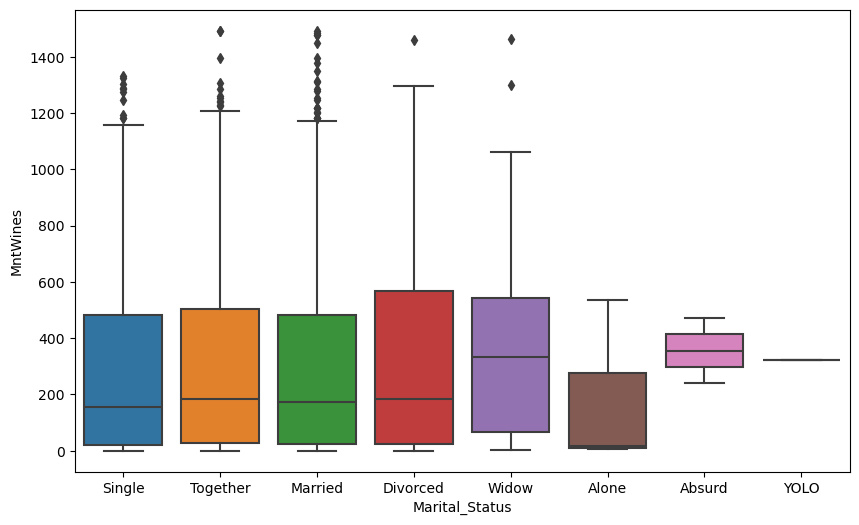

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital_Status', y="MntWines", data=df)

C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Luswata\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be re

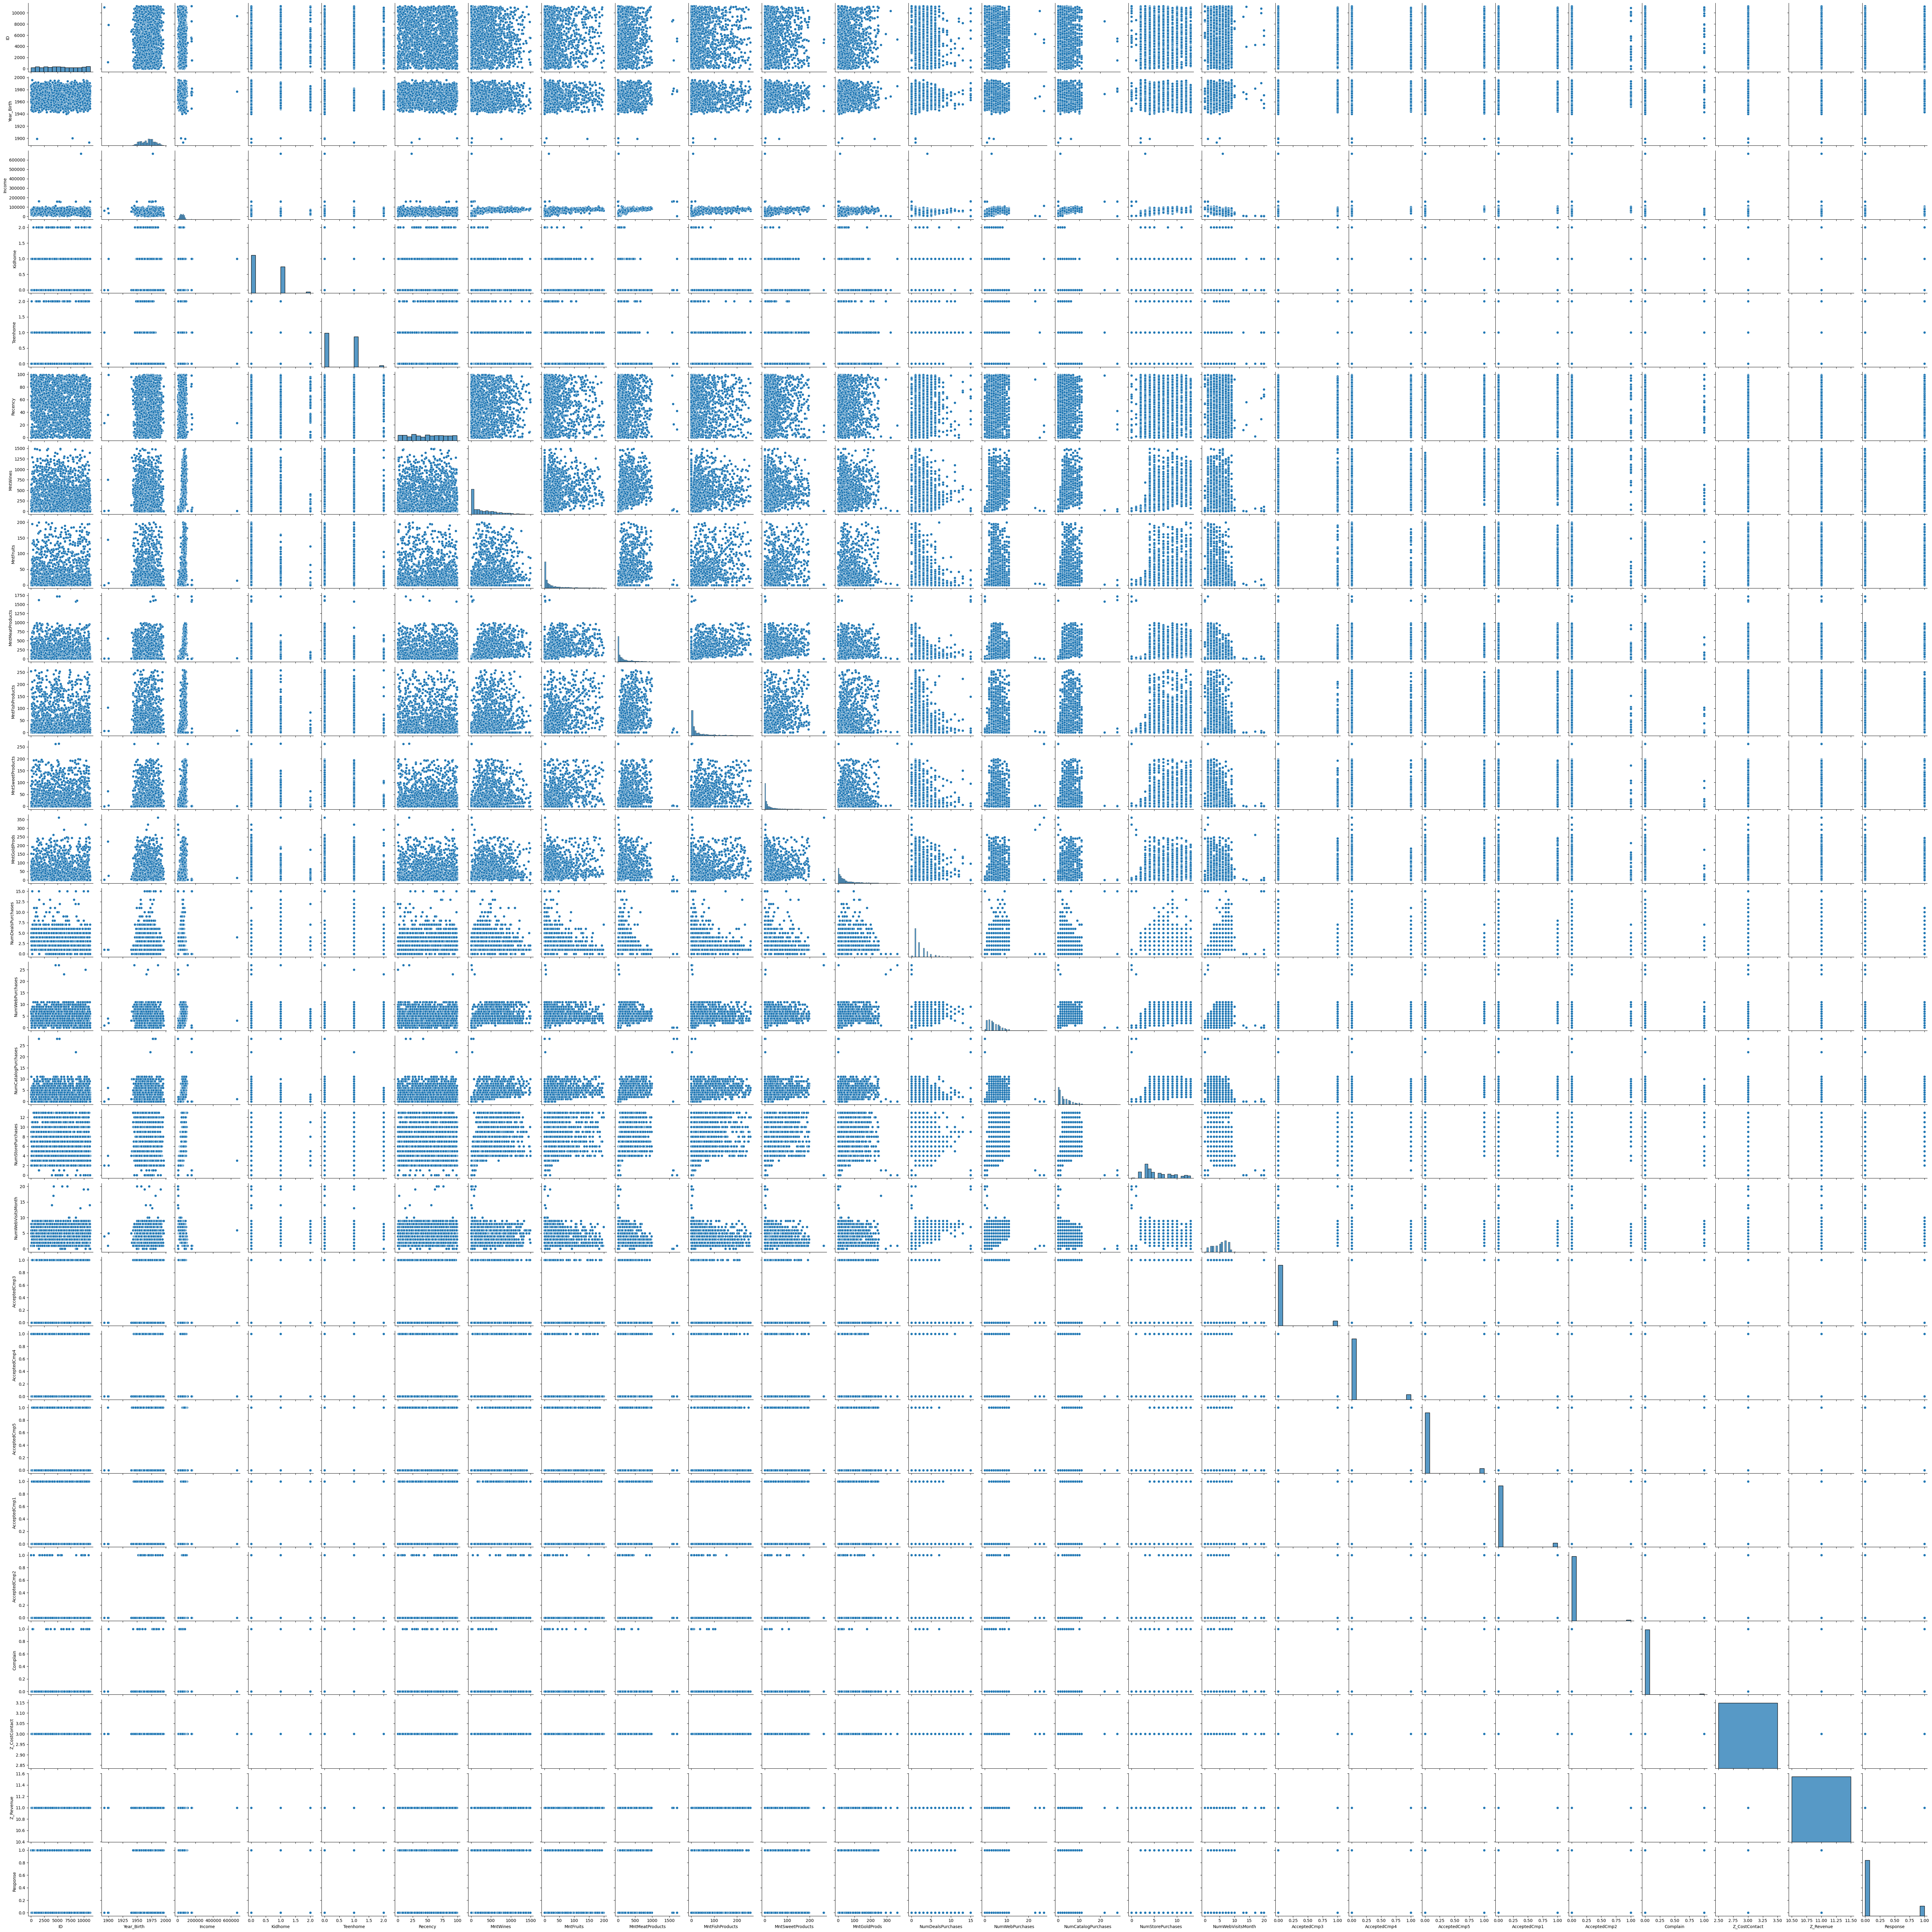

In [56]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='Complain', ylabel='NumWebVisitsMonth'>

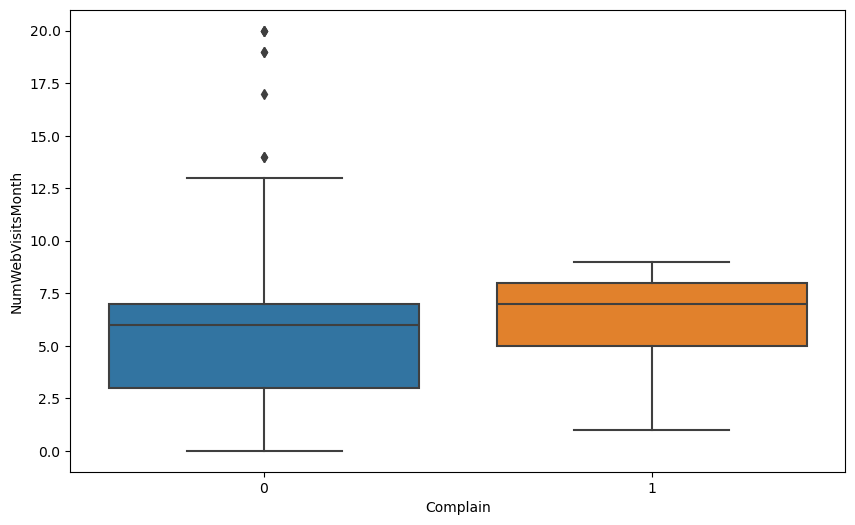

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Complain', y="NumWebVisitsMonth", data=df)
